## Sales Prediction for Big Mart Outlets

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.
<br>

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.
<br>

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly. 

###  Data Dictionary
We have train (8523) and test (5681) data set, train data set has both input and output variable(s). You need to predict the sales for test data set.
<br>

**Train file**:  CSV containing the item outlet information with sales value

<img src="files/1.png" width="700" height="200">

**Test file**: CSV containing item outlet combinations for which sales need to be forecasted

<img src="files/2.png" width="700" height="200">

**Submission file format**

<img src="files/3.png" width="700" height="200">


### Evaluation Metric

Your model performance will be evaluated on the basis of your prediction of the sales for the test data (test.csv), which contains similar data-points as train except for the sales to be predicted. Your submission needs to be in the format as shown in sample submission.
<br>

I have the actual sales for the test dataset, against which your predictions will be evaluated. I will use the Root Mean Square Error value to judge your response.




In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')
train.head(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDJ41,6.850,Low Fat,0.022976,Frozen Foods,261.6594,OUT018,2009,Medium,Tier 3,Supermarket Type2,3401.5722
1,FDD05,NaN,Low Fat,0.016531,Frozen Foods,122.4098,OUT027,1985,Medium,Tier 3,Supermarket Type3,3012.7450
2,FDK14,6.980,Low Fat,0.041338,Canned,83.3934,OUT017,2007,NaN,Tier 2,Supermarket Type1,491.3604
3,FDC26,10.195,Low Fat,0.126383,Canned,112.1886,OUT046,1997,Small,Tier 1,Supermarket Type1,667.1316
4,FDP25,15.200,Low Fat,0.021251,Canned,216.5824,OUT045,2002,NaN,Tier 2,Supermarket Type1,5241.1776
5,FDC59,16.700,Regular,0.000000,Starchy Foods,63.6168,OUT049,1999,Medium,Tier 1,Supermarket Type1,1342.2528
6,NCN06,8.390,Low Fat,0.120497,Household,162.2868,OUT046,1997,Small,Tier 1,Supermarket Type1,2620.5888
7,NCF06,6.235,Low Fat,0.020198,Household,257.9962,OUT046,1997,Small,Tier 1,Supermarket Type1,517.9924
8,NCL30,18.100,Low Fat,0.048940,Household,127.5336,OUT046,1997,Small,Tier 1,Supermarket Type1,1789.6704
9,FDR25,17.000,Regular,0.139522,Canned,266.8884,OUT046,1997,Small,Tier 1,Supermarket Type1,5034.7796


### Checking statistical information of the data

In [3]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,6708.000000,8096.000000,8096.000000,8096.000000,8096.000000
mean,12.852244,0.065988,141.047405,1997.832633,2186.691891
std,4.644016,0.051528,62.218486,8.368403,1708.274124
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.760000,0.026985,94.046200,1987.000000,834.580300
50%,12.600000,0.053730,143.215400,1999.000000,1804.650900
75%,16.750000,0.094251,185.668700,2004.000000,3106.955700
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Checking Feature datatypes

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8096 entries, 0 to 8095
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8096 non-null   object 
 1   Item_Weight                6708 non-null   float64
 2   Item_Fat_Content           8096 non-null   object 
 3   Item_Visibility            8096 non-null   float64
 4   Item_Type                  8096 non-null   object 
 5   Item_MRP                   8096 non-null   float64
 6   Outlet_Identifier          8096 non-null   object 
 7   Outlet_Establishment_Year  8096 non-null   int64  
 8   Outlet_Size                5807 non-null   object 
 9   Outlet_Location_Type       8096 non-null   object 
 10  Outlet_Type                8096 non-null   object 
 11  Item_Outlet_Sales          8096 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 759.1+ KB


### Checking the number of Unique values in the Features

In [5]:
train.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7500
Item_Type                      16
Item_MRP                     5719
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3425
dtype: int64

## Preprocessing of the Data

Checking for the Number of Null Values

In [6]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1388
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2289
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<h3 style='color:blue'>Categorical Attributes

In [7]:
cat_col = []
for x in train.dtypes.index:
    if train.dtypes[x]=='object':
        cat_col.append(x)
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [8]:
cat = [ x for x in train.dtypes.index if train.dtypes[x]=='object']

In [9]:
cat.remove('Item_Identifier')
cat.remove('Outlet_Identifier')

In [10]:
cat

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

<h3> printing Categorical values in the Categorical Features

In [11]:
for col in cat:
    print(col)
    print(train[col].value_counts(), '\n')
    

Item_Fat_Content
Low Fat    4828
Regular    2764
LF          291
reg         107
low fat     106
Name: Item_Fat_Content, dtype: int64 

Item_Type
Fruits and Vegetables    1184
Snack Foods              1143
Household                 862
Frozen Foods              806
Dairy                     647
Canned                    627
Baking Goods              613
Health and Hygiene        482
Soft Drinks               416
Meat                      403
Breads                    240
Hard Drinks               206
Others                    160
Starchy Foods             142
Breakfast                 103
Seafood                    62
Name: Item_Type, dtype: int64 

Outlet_Size
Medium    2643
Small     2278
High       886
Name: Outlet_Size, dtype: int64 

Outlet_Location_Type
Tier 3    3160
Tier 2    2660
Tier 1    2276
Name: Outlet_Location_Type, dtype: int64 

Outlet_Type
Supermarket Type1    5323
Grocery Store        1013
Supermarket Type3     889
Supermarket Type2     871
Name: Outlet_Type, dtype: 

#### Identifying and Filling the Null Values

<AxesSubplot:>

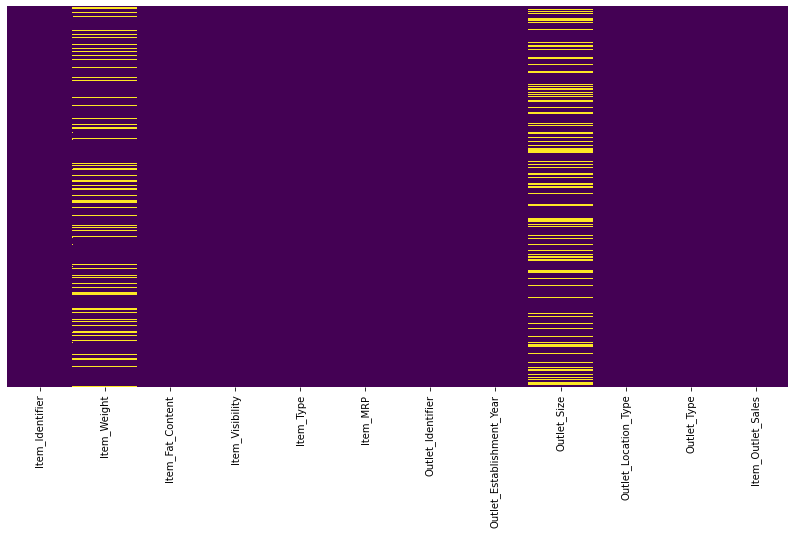

In [12]:
plt.figure(figsize=(14,7))
sns.heatmap(train.isnull(), yticklabels =False, cbar = False, cmap = 'viridis' )

In [13]:
train.Item_Weight.isnull().value_counts()

False    6708
True     1388
Name: Item_Weight, dtype: int64

In [14]:
train.Item_Weight.mode()

0    12.15
dtype: float64

In [15]:
train.Item_Weight.mean()

12.852244335122377

In [16]:
train['Item_Weight'].fillna(12.852244335122377, inplace = True)

<AxesSubplot:>

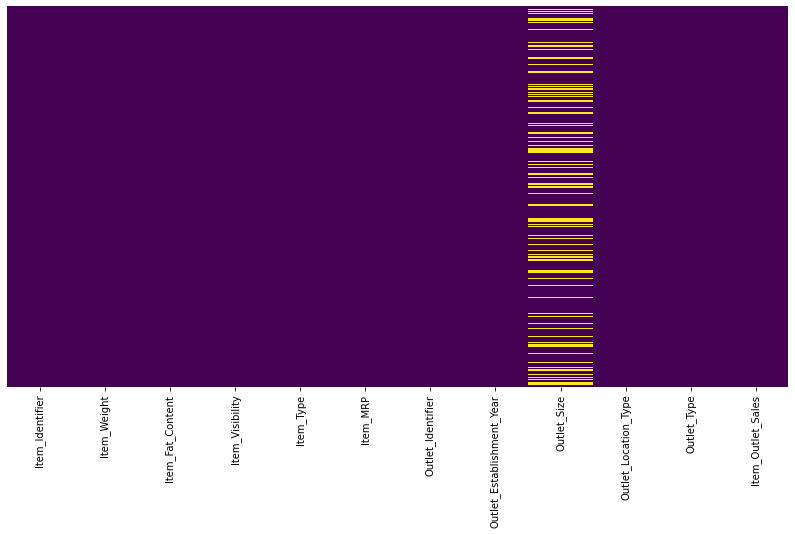

In [17]:
plt.figure(figsize=(14,7))
sns.heatmap(train.isnull(), yticklabels =False, cbar = False, cmap = 'viridis' )

In [18]:
train.Outlet_Size.unique()

array(['Medium', nan, 'Small', 'High'], dtype=object)

In [19]:
train.Outlet_Size.mode()

0    Medium
dtype: object

In [20]:
train['Outlet_Size'] = train.Outlet_Size.fillna('Medium')

In [21]:
train.Outlet_Size.unique()

array(['Medium', 'Small', 'High'], dtype=object)

In [22]:
train.Outlet_Size.value_counts()

Medium    4932
Small     2278
High       886
Name: Outlet_Size, dtype: int64

In [23]:
train['Outlet_Size'].nunique()

3

<AxesSubplot:>

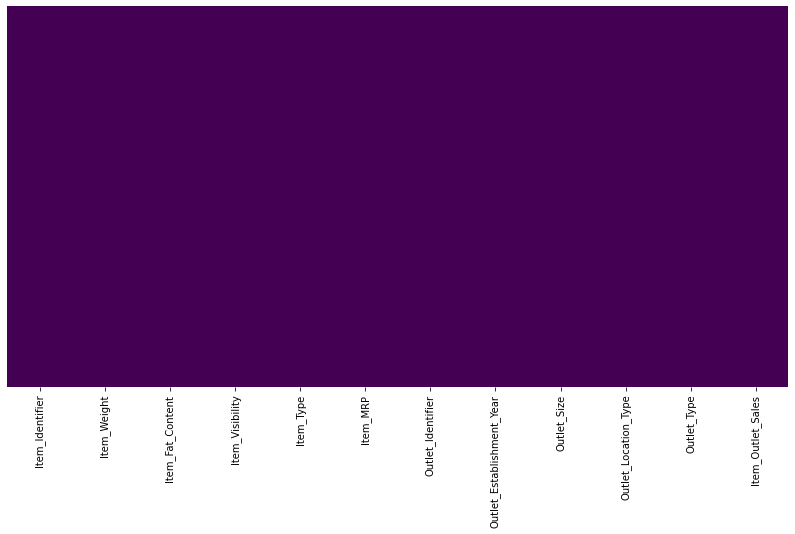

In [24]:
plt.figure(figsize=(14,7))
sns.heatmap(train.isnull(), yticklabels =False, cbar = False, cmap = 'viridis' )

In [25]:
sum(train['Item_Visibility']==0)

492

In [26]:
train.Item_Visibility.mean()

0.06598762630274208

### Replacing 0 values in the Item_Visibility with the Mean Item_Visibility

In [27]:
train.loc[:, 'Item_Visibility'].replace([0], [train['Item_Visibility'].mean()], inplace  = True)

In [28]:
sum(train['Item_Visibility']==0)

0

#### Re-Categoring the Item_Fat_content

In [29]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace({'LF': 'Low Fat','reg':'Regular', 'low fat': 'Low Fat'})

In [30]:
train.Item_Fat_Content.value_counts()

Low Fat    5225
Regular    2871
Name: Item_Fat_Content, dtype: int64

### CREATING NEW ATTRIBUTES

In [31]:
train['New_Item_Type'] = train['Item_Identifier'].apply(lambda x: x[:2])
train['New_Item_Type']

0       FD
1       FD
2       FD
3       FD
4       FD
        ..
8091    FD
8092    FD
8093    FD
8094    NC
8095    NC
Name: New_Item_Type, Length: 8096, dtype: object

In [32]:
train['New_Item_Type'] = train['New_Item_Type'].map({'FD':'Food', 'NC': 'Non-Consumable','DR': 'Drinks'})
train['New_Item_Type'].value_counts()

Food              5836
Non-Consumable    1504
Drinks             756
Name: New_Item_Type, dtype: int64

### Creating new Feature from the establishment year

In [33]:
train['Outlet_Years'] = 2013 - train['Outlet_Establishment_Year']
train['Outlet_Years']

0        4
1       28
2        6
3       16
4       11
        ..
8091    28
8092    11
8093    28
8094    15
8095    28
Name: Outlet_Years, Length: 8096, dtype: int64

## EXPLORATORY DATA ANALYSIS

In [34]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDJ41,6.850000,Low Fat,0.022976,Frozen Foods,261.6594,OUT018,2009,Medium,Tier 3,Supermarket Type2,3401.5722,Food,4
1,FDD05,12.852244,Low Fat,0.016531,Frozen Foods,122.4098,OUT027,1985,Medium,Tier 3,Supermarket Type3,3012.7450,Food,28
2,FDK14,6.980000,Low Fat,0.041338,Canned,83.3934,OUT017,2007,Medium,Tier 2,Supermarket Type1,491.3604,Food,6
3,FDC26,10.195000,Low Fat,0.126383,Canned,112.1886,OUT046,1997,Small,Tier 1,Supermarket Type1,667.1316,Food,16
4,FDP25,15.200000,Low Fat,0.021251,Canned,216.5824,OUT045,2002,Medium,Tier 2,Supermarket Type1,5241.1776,Food,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8091,FDR37,12.852244,Regular,0.065929,Breakfast,183.0292,OUT027,1985,Medium,Tier 3,Supermarket Type3,8209.3140,Food,28
8092,FDE44,14.650000,Low Fat,0.065988,Fruits and Vegetables,49.7692,OUT045,2002,Medium,Tier 2,Supermarket Type1,837.5764,Food,11
8093,FDR12,12.852244,Regular,0.031382,Baking Goods,171.3764,OUT027,1985,Medium,Tier 3,Supermarket Type3,3091.9752,Food,28
8094,NCN43,12.150000,Low Fat,0.011314,Others,122.9730,OUT010,1998,Medium,Tier 3,Grocery Store,123.1730,Non-Consumable,15


<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

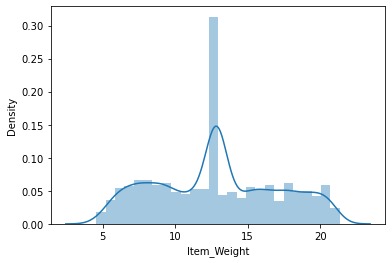

In [35]:
sns.distplot(train['Item_Weight'])

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

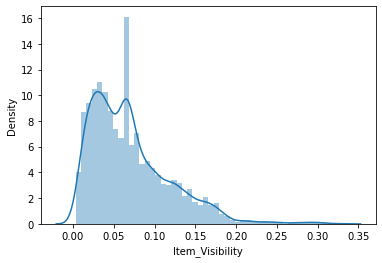

In [36]:
sns.distplot(train['Item_Visibility'])

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

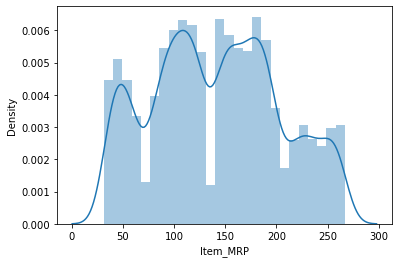

In [37]:
sns.distplot(train['Item_MRP'])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

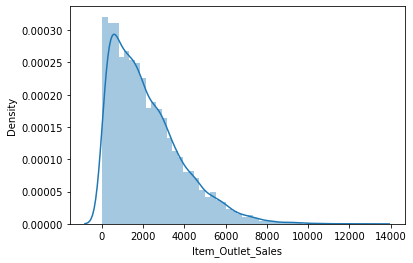

In [38]:
sns.distplot(train['Item_Outlet_Sales'])

In [39]:
train['Item_Outlet_Sales'] = np.log(1 + train['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

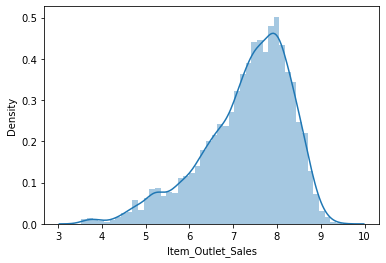

In [40]:
sns.distplot(train['Item_Outlet_Sales'])

### Categorical Attributes 

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

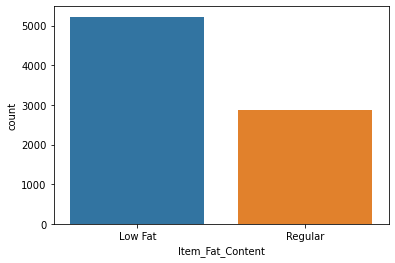

In [41]:
sns.countplot(train['Item_Fat_Content'])

[Text(0, 0, 'Frozen Foods'),
 Text(1, 0, 'Canned'),
 Text(2, 0, 'Starchy Foods'),
 Text(3, 0, 'Household'),
 Text(4, 0, 'Dairy'),
 Text(5, 0, 'Baking Goods'),
 Text(6, 0, 'Others'),
 Text(7, 0, 'Soft Drinks'),
 Text(8, 0, 'Fruits and Vegetables'),
 Text(9, 0, 'Health and Hygiene'),
 Text(10, 0, 'Snack Foods'),
 Text(11, 0, 'Meat'),
 Text(12, 0, 'Breads'),
 Text(13, 0, 'Breakfast'),
 Text(14, 0, 'Hard Drinks'),
 Text(15, 0, 'Seafood')]

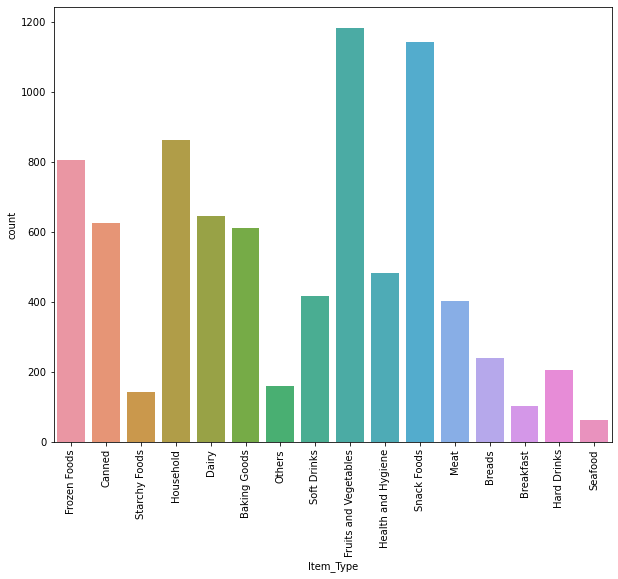

In [42]:
plt.figure(figsize=(10,8))
l = list(train['Item_Type'].unique())
chart = sns.countplot(train['Item_Type'])
chart.set_xticklabels(labels = l, rotation= 90)

[Text(0, 0, '2009'),
 Text(1, 0, '1985'),
 Text(2, 0, '2007'),
 Text(3, 0, '1997'),
 Text(4, 0, '2002'),
 Text(5, 0, '1999'),
 Text(6, 0, '2004'),
 Text(7, 0, '1998'),
 Text(8, 0, '1987')]

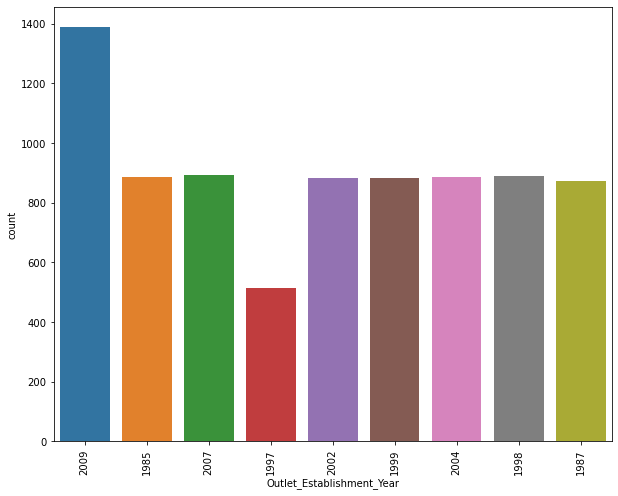

In [43]:
plt.figure(figsize=(10,8))
l = list(train['Outlet_Establishment_Year'].unique())
chart = sns.countplot(train['Outlet_Establishment_Year'])
chart.set_xticklabels(labels = l, rotation= 90)

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

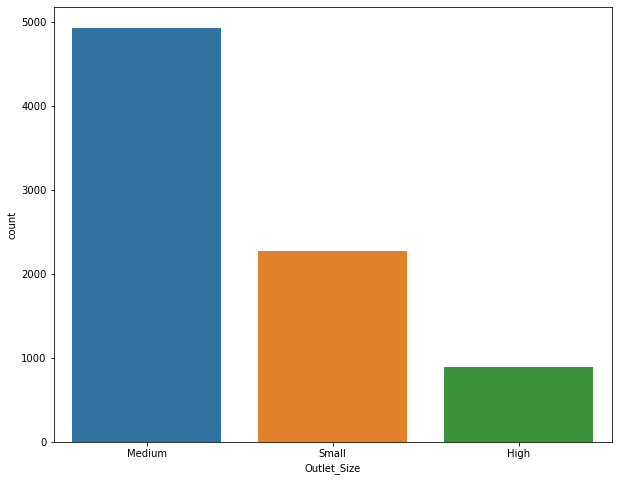

In [44]:
plt.figure(figsize=(10,8))
sns.countplot(train['Outlet_Size'])

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

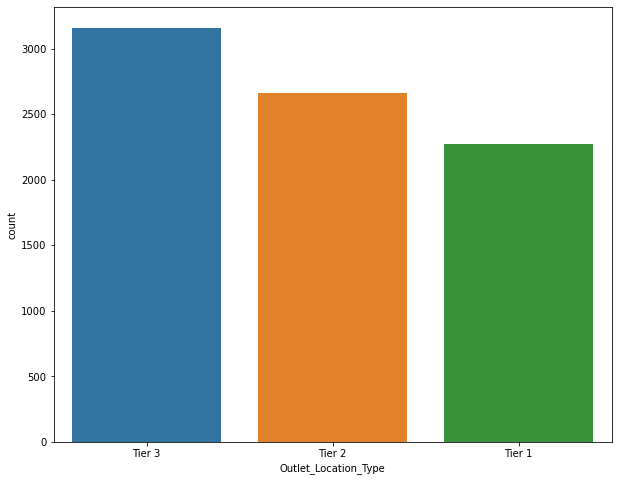

In [45]:
plt.figure(figsize=(10,8))
sns.countplot(train['Outlet_Location_Type'])

[Text(0, 0, 'Supermarket Type2'),
 Text(1, 0, 'Supermarket Type3'),
 Text(2, 0, 'Supermarket Type1'),
 Text(3, 0, 'Grocery Store')]

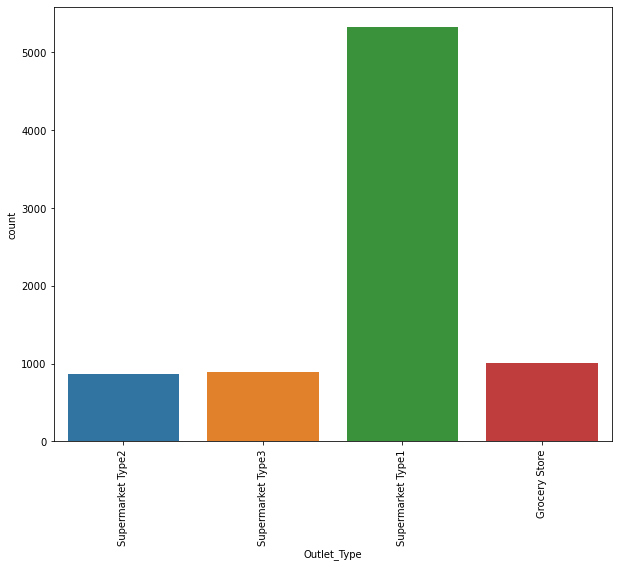

In [46]:
plt.figure(figsize=(10,8))
l = list(train['Outlet_Type'].unique())
chart = sns.countplot(train['Outlet_Type'])
chart.set_xticklabels(labels = l, rotation= 90)

## Correlation Matrix

<AxesSubplot:>

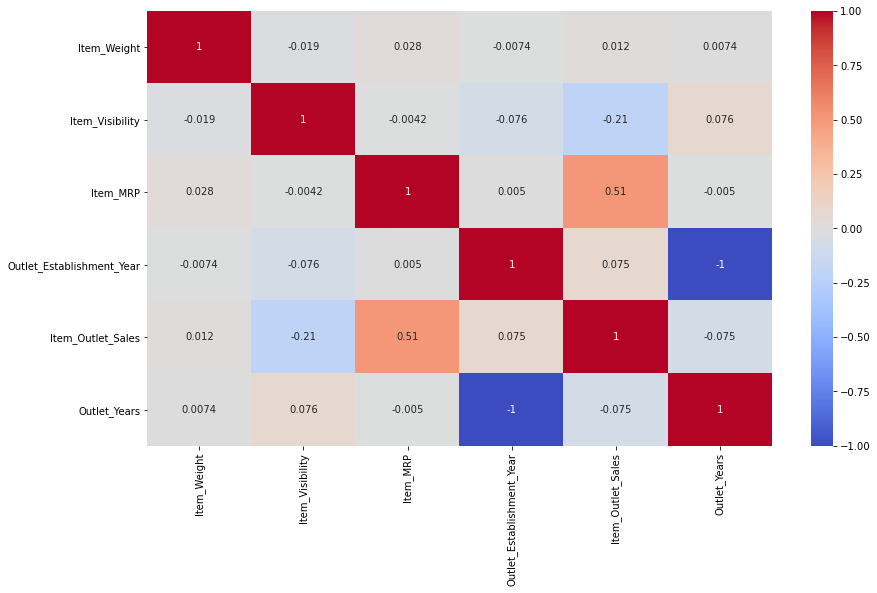

In [47]:
corr = train.corr()
plt.figure(figsize = (14, 8))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')

## Encoding

label encoding 

In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8096 entries, 0 to 8095
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8096 non-null   object 
 1   Item_Weight                8096 non-null   float64
 2   Item_Fat_Content           8096 non-null   object 
 3   Item_Visibility            8096 non-null   float64
 4   Item_Type                  8096 non-null   object 
 5   Item_MRP                   8096 non-null   float64
 6   Outlet_Identifier          8096 non-null   object 
 7   Outlet_Establishment_Year  8096 non-null   int64  
 8   Outlet_Size                8096 non-null   object 
 9   Outlet_Location_Type       8096 non-null   object 
 10  Outlet_Type                8096 non-null   object 
 11  Item_Outlet_Sales          8096 non-null   float64
 12  New_Item_Type              8096 non-null   object 
 13  Outlet_Years               8096 non-null   int64

In [49]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['Outlet'] = le.fit_transform(train['Outlet_Identifier'])
cat_col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type','New_Item_Type']
for col in cat_col:
    train[col] = le.fit_transform(train[col])

One hot Encoding

In [50]:
train = pd.get_dummies(train, columns = ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type','New_Item_Type'])
train.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Outlet,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,FDJ41,6.850000,0.022976,5,261.6594,OUT018,2009,8.132287,4,3,...,0,0,1,0,0,1,0,0,1,0
1,FDD05,12.852244,0.016531,5,122.4098,OUT027,1985,8.010939,28,5,...,0,0,1,0,0,0,1,0,1,0
2,FDK14,6.980000,0.041338,3,83.3934,OUT017,2007,6.199211,6,2,...,0,1,0,0,1,0,0,0,1,0
3,FDC26,10.195000,0.126383,3,112.1886,OUT046,1997,6.504485,16,8,...,1,0,0,0,1,0,0,0,1,0
4,FDP25,15.200000,0.021251,3,216.5824,OUT045,2002,8.564492,11,7,...,0,1,0,0,1,0,0,0,1,0


<h3 style="color: red"> Detecting Outliers

In [51]:
def outlierDetector(df, feature):
    plt.figure(figsize = (10,5))
    sns.boxplot(x = df[feature])

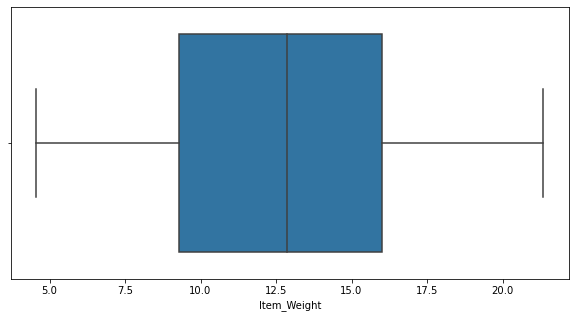

In [52]:
outlierDetector(train, 'Item_Weight')

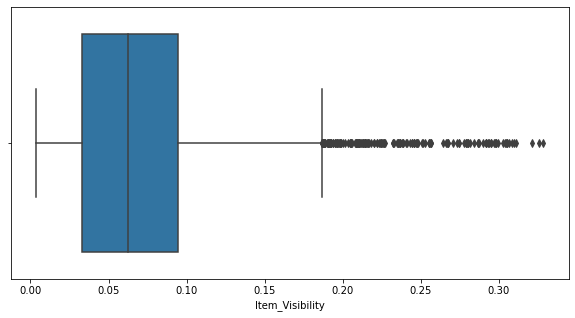

In [53]:
outlierDetector(train, 'Item_Visibility')

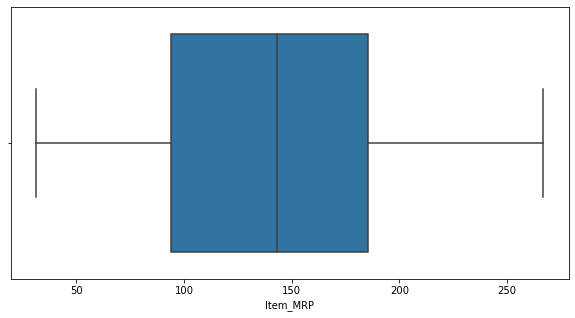

In [54]:
outlierDetector(train, 'Item_MRP')

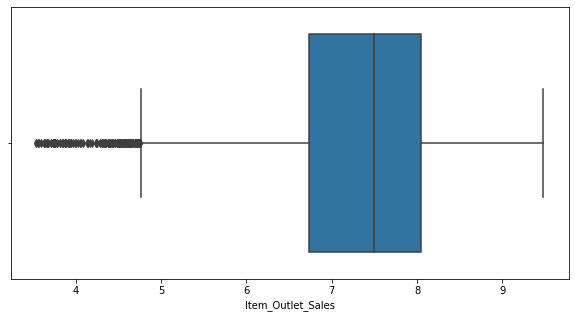

In [55]:
outlierDetector(train, 'Item_Outlet_Sales')

<h3 style="color: green"> Removing outliers

In [56]:
def outlierTreater(df,feature,quant):
    min_threshold, max_threshold = df[feature].quantile([quant[0],quant[1]])
    print('1. Minimum Threshold: ', min_threshold, '\n2. Maximum Threshold: ', max_threshold)
    
    return df[(df[feature]<max_threshold) & (df[feature]>min_threshold)]

In [57]:
train_no_outlier = outlierTreater(train, 'Item_Visibility', [0.05,0.95])

1. Minimum Threshold:  0.013263340999999998 
2. Maximum Threshold:  0.16332053125


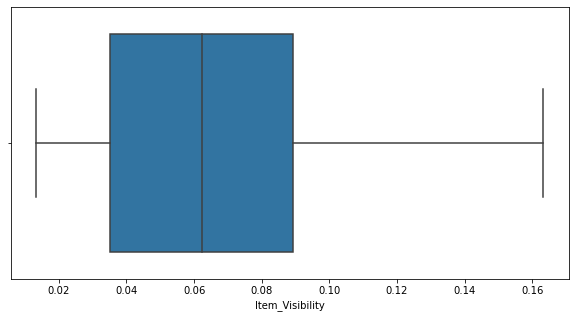

In [59]:
outlierDetector(train_no_outlier, 'Item_Visibility')

In [61]:
train_no_outlier = outlierTreater(train, 'Item_Outlet_Sales', [0.1, 0.9])

1. Minimum Threshold:  5.842247344312063 
2. Maximum Threshold:  8.427207082875949


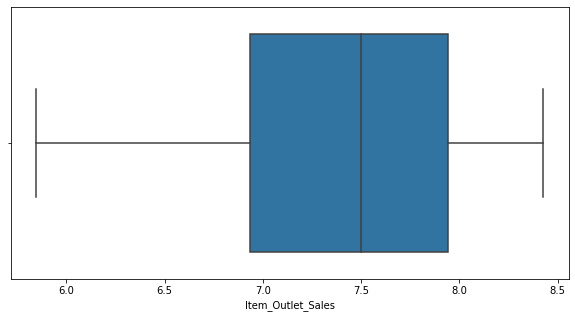

In [62]:
outlierDetector(train_no_outlier, 'Item_Outlet_Sales')

## Input Split

In [63]:
X = train_no_outlier.drop(columns = ['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])
y = train_no_outlier['Item_Outlet_Sales']

<h3 style='color: blue'> Creating a function for model training

In [64]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
def train(model, X, y):
    
    # training the model
    model.fit(X,y)
    
    # predict the train set
    predictions = model.predict(X)
    
    # cross validation 
    cv_score = cross_val_score(model, X, y, scoring = 'neg_mean_squared_error')
    cv_score = np.abs(np.mean(cv_score))
    print('Model Report')
    print('Mean Squared Error: ', mean_squared_error(y,predictions))
    print('Cross validation Score: ', cv_score)

## Linear regression

Model Report
Mean Squared Error:  0.21526399343633507
Cross validation Score:  0.2169355888641286


<AxesSubplot:title={'center':'Model Coefficients'}>

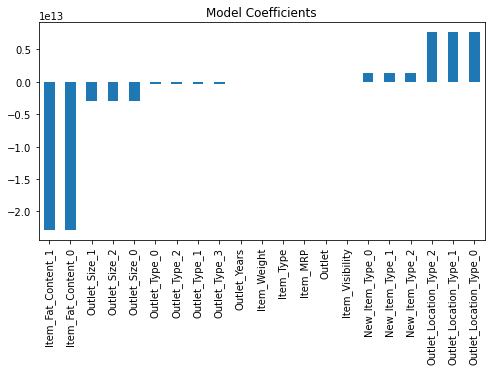

In [70]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
model = LinearRegression(normalize=True)
train(model, X, y)
coeff = pd.Series(model.coef_, X.columns).sort_values()
coeff.plot(kind = 'bar', title = 'Model Coefficients', figsize =(8, 4))

## Ridge

Model Report
Mean Squared Error:  0.27696676880581683
Cross validation Score:  0.2777463334259679


<AxesSubplot:title={'center':'Model Coefficients'}>

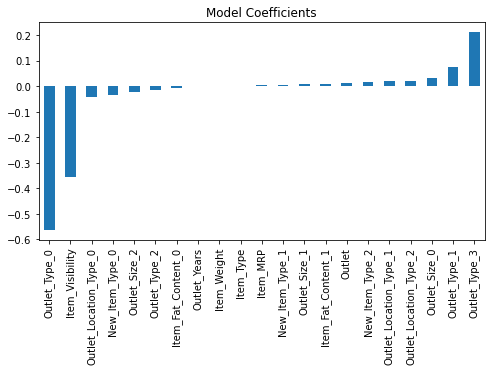

In [71]:
model = Ridge(normalize=True)
train(model, X, y)
coeff = pd.Series(model.coef_, X.columns).sort_values()
coeff.plot(kind = 'bar', title = 'Model Coefficients', figsize =(8, 4))

## Lasso

Model Report
Mean Squared Error:  0.34247683837871895
Cross validation Score:  0.34263835152552186


<AxesSubplot:title={'center':'Model Coefficients'}>

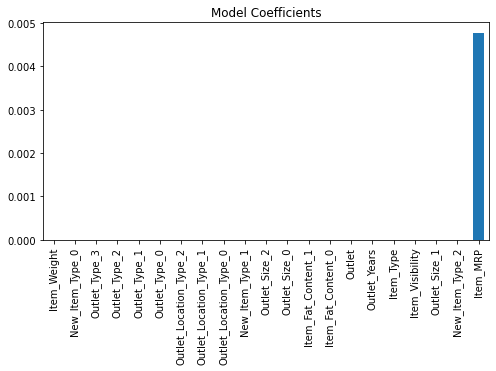

In [72]:
model = Lasso()
train(model, X, y)
coeff = pd.Series(model.coef_, X.columns).sort_values()
coeff.plot(kind = 'bar', title = 'Model Coefficients', figsize =(8, 4))

Model Report
Mean Squared Error:  7.3099080020479855e-34
Cross validation Score:  0.4071557527766587


<AxesSubplot:title={'center':'Feature Importance'}>

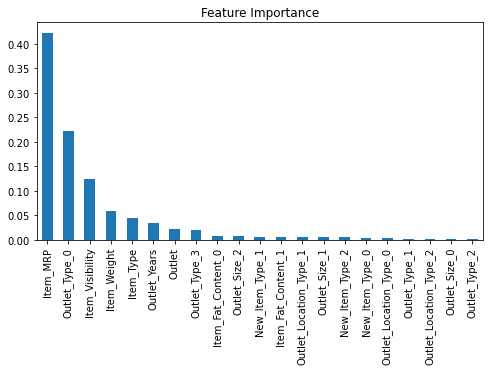

In [73]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, X, y)
coeff = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coeff.plot(kind = 'bar', title = 'Feature Importance', figsize =(8, 4))

## Random Forest

Model Report
Mean Squared Error:  0.030088078320246972
Cross validation Score:  0.2160771352808608


<AxesSubplot:title={'center':'Feature Importance'}>

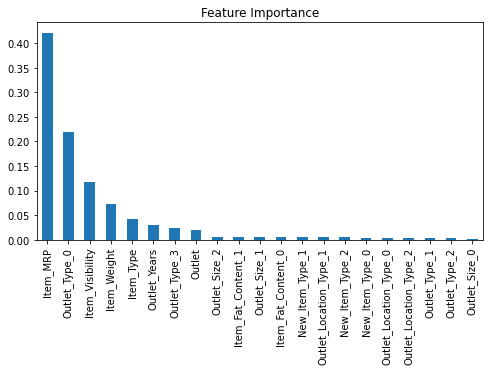

In [74]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train(model, X, y)
coeff = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coeff.plot(kind = 'bar', title = 'Feature Importance', figsize =(8, 4))

### Extra Tree 

Model Report
Mean Squared Error:  1.0233530073827085e-28
Cross validation Score:  0.22898028887030053


<AxesSubplot:title={'center':'Feature Importance'}>

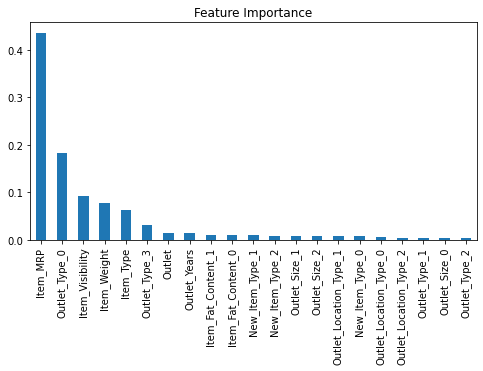

In [75]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
train(model, X, y)
coeff = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coeff.plot(kind = 'bar', title = 'Feature Importance', figsize =(8, 4))

Model Report
Mean Squared Error:  0.21554355466716196
Cross validation Score:  0.22366197240392763


<AxesSubplot:title={'center':'Feature Importance'}>

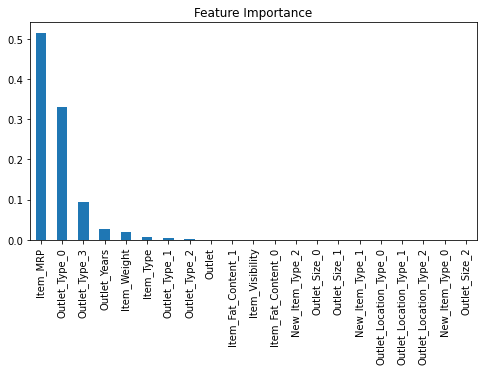

In [76]:
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor()
train(model, X, y)
coeff = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coeff.plot(kind = 'bar', title = 'Feature Importance', figsize =(8, 4))

## Creating a data frame of Model Predictions

In [77]:
model_used = ['Linear Regression', 'Lasso', 'Ridge', 'Decision Tree Regressor', 'Random Forest', 
              'EXtra Tree Regressor', 'AdaBoostRegressor']
mse = [0.215, 0.342, 0.277, 7.310, 0.030, 1.023, 0.216]
cvs = [0.216, 0.343, 0.277, 0.407, 0.216, 0.228, 0.224]

In [78]:
d = {'Model': model_used, 'MSE': mse, 'Cross Validation Score': cvs}
pd.DataFrame(data = d)

,Model,MSE,Cross Validation Score
0,Linear Regression,0.215,0.216
1,Lasso,0.342,0.343
2,Ridge,0.277,0.277
3,Decision Tree Regressor,7.310,0.407
4,Random Forest,0.030,0.216
5,EXtra Tree Regressor,1.023,0.228
6,AdaBoostRegressor,0.216,0.224


<h3> The Best 3 models </h3>

<ul>
    <li> Random Forest</li>
    <li> AdaBoostRegressor</li>
    <li> Random Forest</li>
</ul>

### Hyperparameter tuning